In [326]:
import matplotlib.pyplot as plt
import complexity as c
import pandas as pd
import numpy as np
import saver as s

d = pd.read_csv('item/index.csv',dtype={'Name':str})

d['K conditional complexity'] = ''
d['Causal complexity'] = ''
d['Specified complexity'] = ''
d['Array'] = ''

In [333]:
for name in d.Name:
    d.loc[d.Name==name,'K conditional complexity'] = c.kolmogorov_conditional_complexity(d.Formula[d.Name==name].item())

    with open(f'item/{name}.npy', 'rb') as f:
            d.loc[d.Name==name,'Array'] = [np.load(f)]
    
    d.loc[d.Name==name,'Causal complexity'] = c.causal_complexity(d.Array[d.Name==name].item())

d['Specified complexity'] = d['Causal complexity']-d['K conditional complexity']
d['Spontaneous emergence'] = d['Spontaneous emergence'].astype(int)


In [334]:
d

,Name,Category,Formula,Spontaneous emergence,K conditional complexity,Causal complexity,Specified complexity,Array
0,block,oscillators,X = X ⊕ #0,1,26,16,-10,"[[False, False, False, False], [False, True, T..."
1,blinker,oscillators,X = X ⊕ ^2 #0,1,31,15,-16,"[[False, False, False, False, False], [False, ..."
2,caterer,oscillators,X = X ⊕ ^3 #0,1,31,48,17,"[[False, False, True, False, False, False, Fal..."
3,mazing,oscillators,X = X ⊕ ^4 #0,1,31,49,18,"[[False, False, False, True, True, False, Fals..."
4,pseudo-barberpole,oscillators,X = X ⊕ ^5 #0,0,31,144,113,"[[False, False, False, False, False, False, Fa..."
5,unix,oscillators,X = X ⊕ ^6 #0,1,31,64,33,"[[False, True, True, False, False, False, Fals..."
6,burloaferimeter,oscillators,X = X ⊕ 7 #0,0,29,110,81,"[[False, False, False, False, True, True, Fals..."
7,figure_eight,oscillators,X = X ⊕ ^8 #0,1,31,36,5,"[[True, True, False, False, False, False], [Tr..."
8,29P9,oscillators,X = X ⊕ ^9 #0,0,31,144,113,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,glider,spaceship,X ↓ → = X ⊕ ^4 #0,1,41,25,-16,"[[False, False, False, False, False], [False, ..."


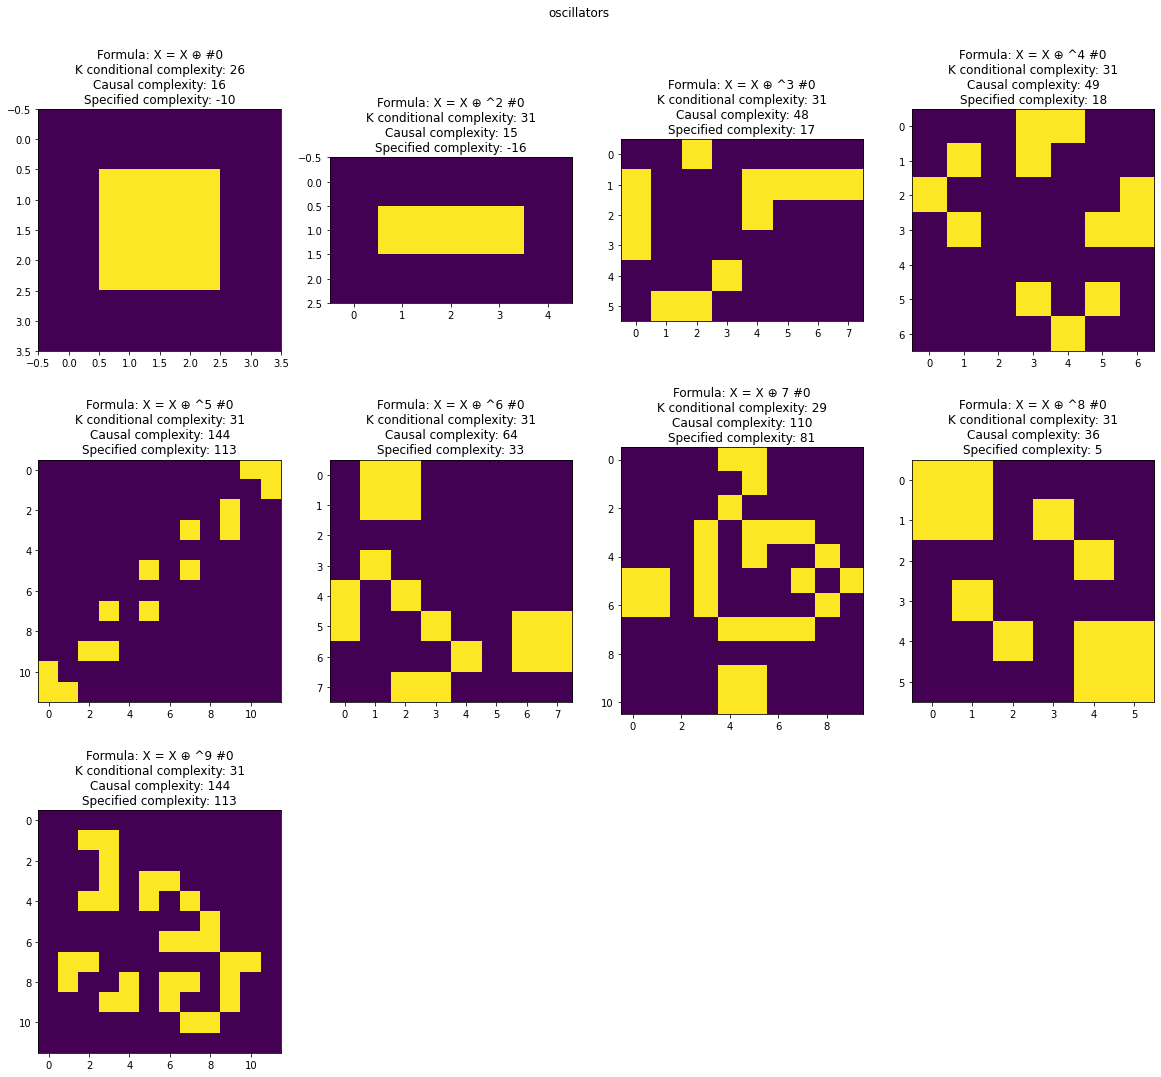

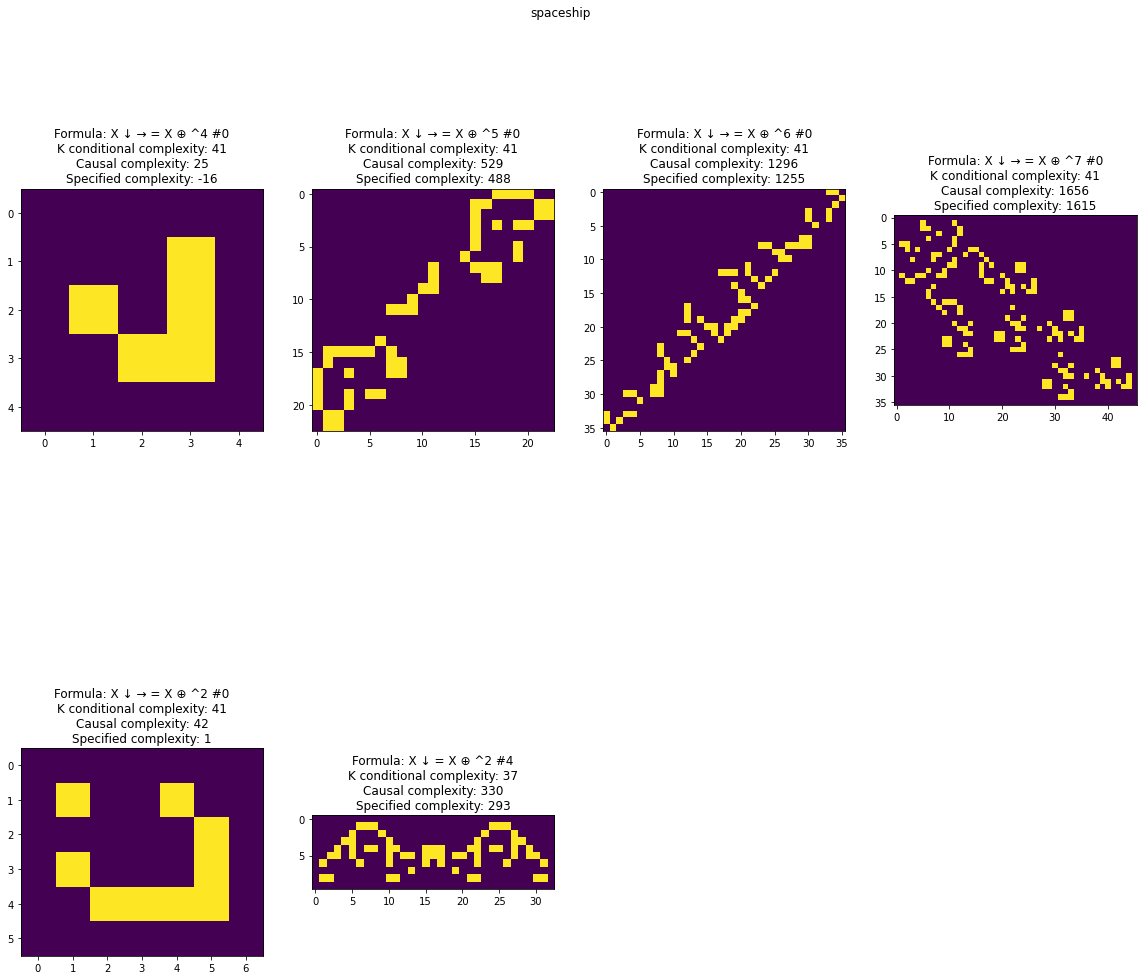

In [285]:
for category in d.Category.unique():
    nb_col = d[d.Category==category].index.shape[0]
    nb_row = (nb_col-1)//4+1
    if nb_col>4: nb_col=4
    
    plt.figure(figsize=(20,6))
    plt.suptitle(category)

    for i,id in enumerate(d[d.Category==category].index):
        plt.subplot(nb_row,nb_col,1+i)
        plt.imshow(d.loc[id].Array)
        plt.title(f"Formula: {d.loc[id].Formula}\nK conditional complexity: {d.loc[id]['K conditional complexity']}\nCausal complexity: {d.loc[id]['Causal complexity']}\nSpecified complexity: {d.loc[id]['Specified complexity']}")

    plt.subplots_adjust(bottom=-1.5,top=0.8)
    plt.show()

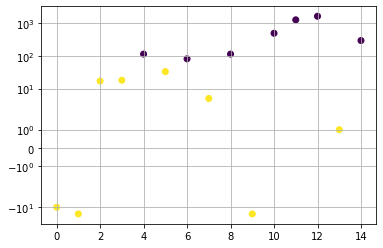

In [361]:
plt.scatter(x=d.index,y=d['Specified complexity'],c=d['Spontaneous emergence'])
plt.yscale('symlog')
plt.grid()
plt.show()

---
# Build patterns

> ## From .npy files

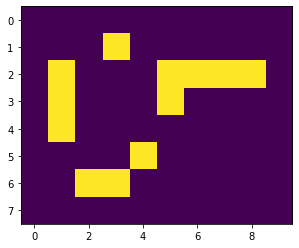

In [190]:
name = 'caterer'

with open(f'item/{name}.npy', 'rb') as f:
       array = np.load(f)

plt.imshow(array)
plt.show()

In [189]:
#s.save(name,array)

> ## Save new patterns

In [196]:
def add_blank(array):
    array = np.vstack((array,np.zeros(array.shape[1])))
    array = np.vstack((np.zeros(array.shape[1]),array))
    array = np.hstack((array,np.zeros(array.shape[0]).reshape([-1,1])))
    array = np.hstack((np.zeros(array.shape[0]).reshape([-1,1]),array))
    return array

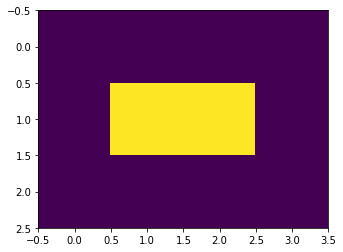

In [235]:
array = np.array([
 [1,1]
],dtype=bool)[::-1,::-1]

plt.imshow(add_blank(array))
plt.show()

In [231]:
s.save('',array)